In [1]:
import pandas as pd

business = pd.read_json('../yelp_dataset/yelp_academic_dataset_business.json', lines=True)
business.shape[0]

160585

In [2]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [3]:
business.dropna(inplace=True, subset=['business_id', 'name', 'address', 'latitude', 'longitude', 'stars', 'review_count', 'categories'])
business.shape[0]

160470

In [4]:
restaurants = business.loc[business['categories'].str.contains('Restaurants|Food')]
restaurants.shape[0]
restaurants.to_json('../yelp_dataset/yelp_academic_dataset_business_restaurants.json', orient='records', lines=True)

In [5]:
import seaborn as sns
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

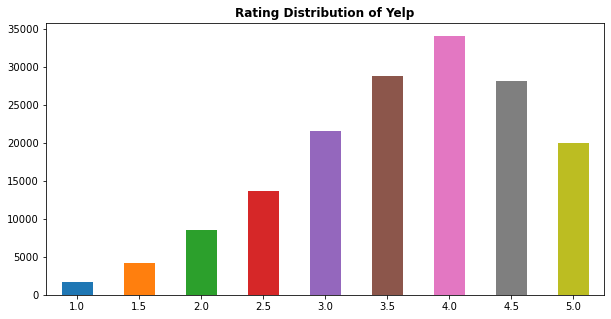

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette()
rating = business['stars'].value_counts()
rating.sort_index(inplace=True)
rating.plot(kind='bar', 
            figsize=(10, 5),
            color=colors[:9],
            rot=0) #字体倾斜角度
plt.title('Rating Distribution of Yelp',fontweight='bold')
plt.show()

In [7]:
import numpy as np

business['categories'] = business['categories'].apply(lambda x: x if x else ' ')
category_str = ','.join(business['categories'])
category_list = category_str.split(',')
category_df = pd.DataFrame(category_list, columns=['category'])
category_df['category'] = category_df['category'].str.strip()
top15_category = category_df['category'].value_counts()[:15]
top15_category

Restaurants                  50763
Food                         29469
Shopping                     26205
Beauty & Spas                16574
Home Services                16465
Health & Medical             15102
Local Services               12192
Nightlife                    11990
Bars                         10741
Automotive                   10119
Event Planning & Services     9644
Active Life                   9231
Coffee & Tea                  7725
Sandwiches                    7272
Fashion                       6599
Name: category, dtype: int64

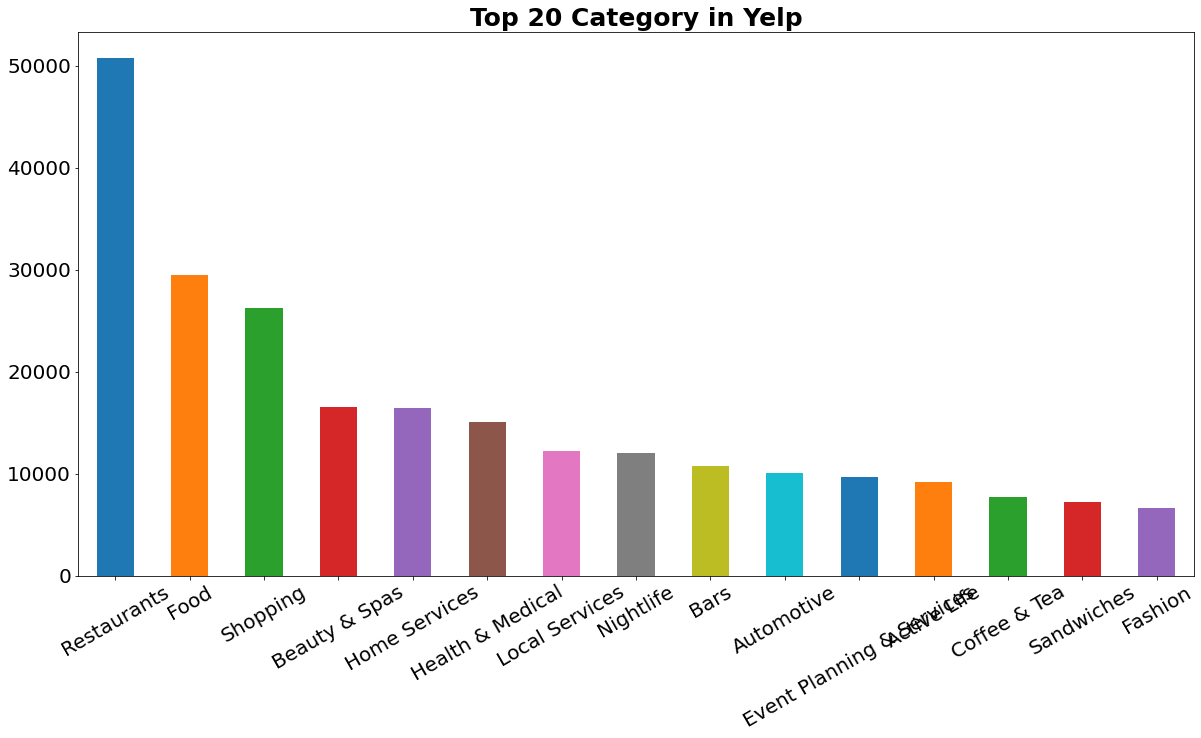

In [8]:
top15_category.plot(kind='bar',
                    color=colors[:20],
                    figsize=(20, 10), 
                    rot=30,
                    fontsize=20)
plt.title('Top 20 Category in Yelp',
          fontsize=25, 
          fontweight='bold')
plt.show()

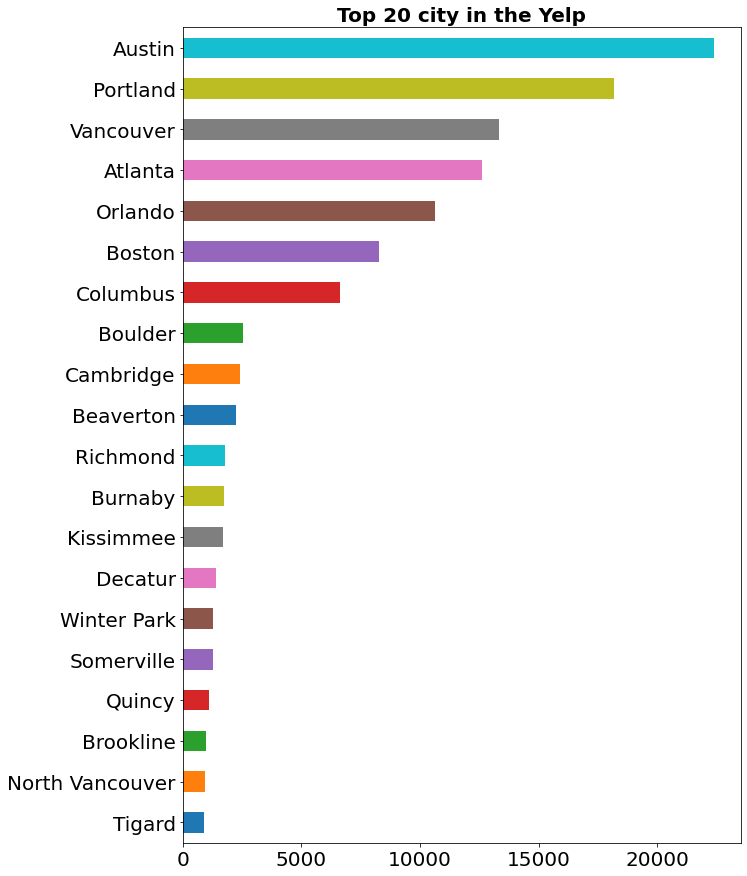

In [9]:
citys = business['city'].value_counts()[:20]
citys.sort_values(ascending=True, inplace=True)#降序，原地修改原始数据
citys.plot(kind='barh',   #水平条形图
           figsize=(10, 15),
           fontsize=20,
           color=colors[:20])
plt.title('Top 20 city in the Yelp', 
          fontsize=20, 
          fontweight='bold')
plt.show()